# k_beauty 분석

# 라이브러리 가져오기

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
import os

sns.set(font = "NanumGothicCoding")


In [8]:
%config InlineBackend.figure_format = "retina"

# 데이터 로드하기

In [14]:
df_raw = pd.read_csv("국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20200513205716.csv", encoding = "cp949" )
df_raw.shape

(450, 28)

In [18]:
df_raw["국가(대륙)별"].value_counts()

미국            45
중남미           45
아세안(ASEAN)    45
대양주           45
중동            45
EU            45
일본            45
합계            45
기타            45
중국            45
Name: 국가(대륙)별, dtype: int64

In [21]:
df_raw[df_raw["국가(대륙)별"] =="미국"]

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4,2020 1/4 p)
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,...,53209,42679,40207,37631,48978,40918,44861,55386,53848,38489
46,미국,합계,면세점,-,-,-,-,-,-,-,...,12177,5184,3603,2317,2079,2657,2951,1818,1481,698
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,...,41032,37495,36604,35314,46899,38261,41910,53568,52367,37791
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,...,854,2033,1553,1784,1774,1298,1408,1653,1382,1191
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,0,0,0,0,1,0,0,0,0,0
50,미국,컴퓨터 및 주변기기,면세점 이외,-,-,-,-,-,-,-,...,854,2033,1553,1784,1773,1298,1408,1653,1382,1191
51,미국,가전·전자·통신기기,계,2875,2758,2894,3527,4397,3589,2982,...,2394,1737,1716,1723,1886,1845,1837,3166,1785,1841
52,미국,가전·전자·통신기기,면세점,-,-,-,-,-,-,-,...,32,65,38,72,52,66,116,107,49,12
53,미국,가전·전자·통신기기,면세점 이외,-,-,-,-,-,-,-,...,2362,1672,1678,1651,1834,1779,1721,3059,1736,1829
54,미국,소프트웨어,계,47,57,49,128,182,113,163,...,125,175,251,172,269,88,156,118,338,98


# tidy data 만들기

In [28]:
df = df_raw.melt(id_vars = ["국가(대륙)별", "상품군별", "판매유형별"], 
                                        var_name = "기간", value_name = "백만원")
df.shape

(11250, 5)

In [29]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11250 entries, 0 to 11249
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  11250 non-null  object
 1   상품군별     11250 non-null  object
 2   판매유형별    11250 non-null  object
 3   기간       11250 non-null  object
 4   백만원      11250 non-null  object
dtypes: object(5)
memory usage: 439.6+ KB


# 데이터 전처리

In [31]:
df["기간"]

0           2014 1/4
1           2014 1/4
2           2014 1/4
3           2014 1/4
4           2014 1/4
            ...     
11245    2020 1/4 p)
11246    2020 1/4 p)
11247    2020 1/4 p)
11248    2020 1/4 p)
11249    2020 1/4 p)
Name: 기간, Length: 11250, dtype: object

In [33]:
int("2019 4/4 p)".split()[0])

2019

In [41]:
df["연도"] = df["기간"].map(lambda x : int(x.split()[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도
0,합계,합계,계,2014 1/4,148272,2014
1,합계,합계,면세점,2014 1/4,-,2014
2,합계,합계,면세점 이외,2014 1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014


In [45]:
"2019 1/4 p)".split()[1].split("/")[0]

'1'

In [50]:
df["분기"] = df["기간"].map(lambda x : int(x.split()[1].split("/")[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272,2014,1
1,합계,합계,면세점,2014 1/4,-,2014,1
2,합계,합계,면세점 이외,2014 1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014,1


In [54]:
df["백만원"] = df["백만원"].replace("-", pd.np.nan).astype(float)
df.head()

/home/ys/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기,백만언
0,합계,합계,계,2014 1/4,148272.0,2014,1,148272.0
1,합계,합계,면세점,2014 1/4,NaN,2014,1,NaN
2,합계,합계,면세점 이외,2014 1/4,NaN,2014,1,NaN
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915.0,2014,1,4915.0
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1,NaN


In [90]:
df[(df["국가(대륙)별"] != "합계") & (df["상품군별"] != "합계")].copy()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기,백만언
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1,2216.0
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1,NaN
50,미국,컴퓨터 및 주변기기,면세점 이외,2014 1/4,NaN,2014,1,NaN
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1,2875.0
52,미국,가전·전자·통신기기,면세점,2014 1/4,NaN,2014,1,NaN
...,...,...,...,...,...,...,...,...
11245,기타,생활용품 및 자동차용품,면세점,2020 1/4 p),0.0,2020,1,0.0
11246,기타,생활용품 및 자동차용품,면세점 이외,2020 1/4 p),384.0,2020,1,384.0
11247,기타,기 타,계,2020 1/4 p),916.0,2020,1,916.0
11248,기타,기 타,면세점,2020 1/4 p),0.0,2020,1,0.0


In [91]:
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        3600
연도            0
분기            0
백만언        3600
dtype: int64

# k_beauty 시각화

In [92]:
df_total = df[df["판매유형별"] == "계"].copy()
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기,백만언
0,합계,합계,계,2014 1/4,148272.0,2014,1,148272.0
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915.0,2014,1,4915.0
6,합계,가전·전자·통신기기,계,2014 1/4,13259.0,2014,1,13259.0
9,합계,소프트웨어,계,2014 1/4,361.0,2014,1,361.0
12,합계,서 적,계,2014 1/4,1563.0,2014,1,1563.0


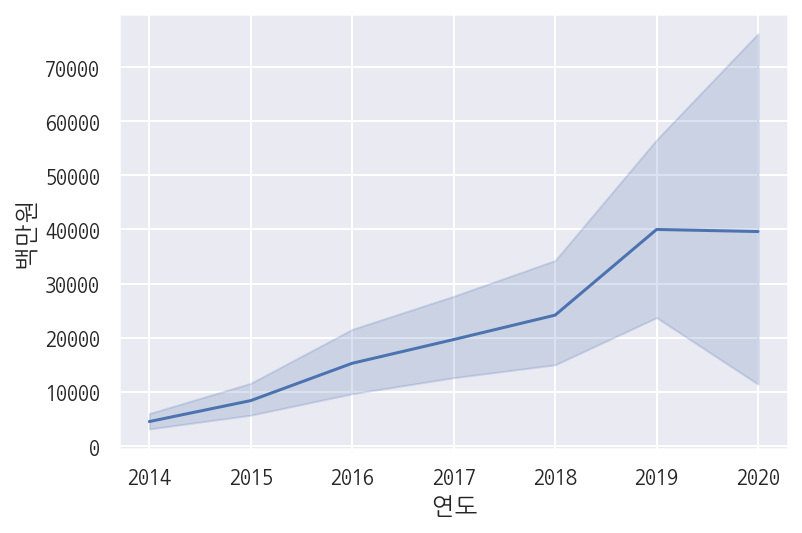

In [93]:
sns.lineplot(data  = df_total, x = "연도", y = "백만원")

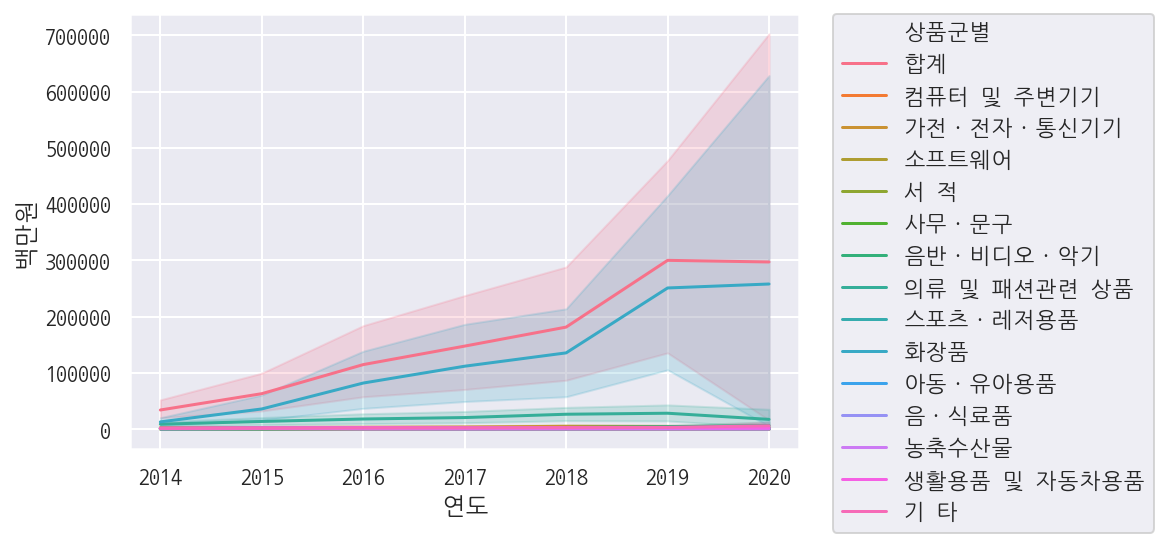

In [94]:
sns.lineplot(data = df_total, x = "연도", y = "백만원", hue = "상품군별")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

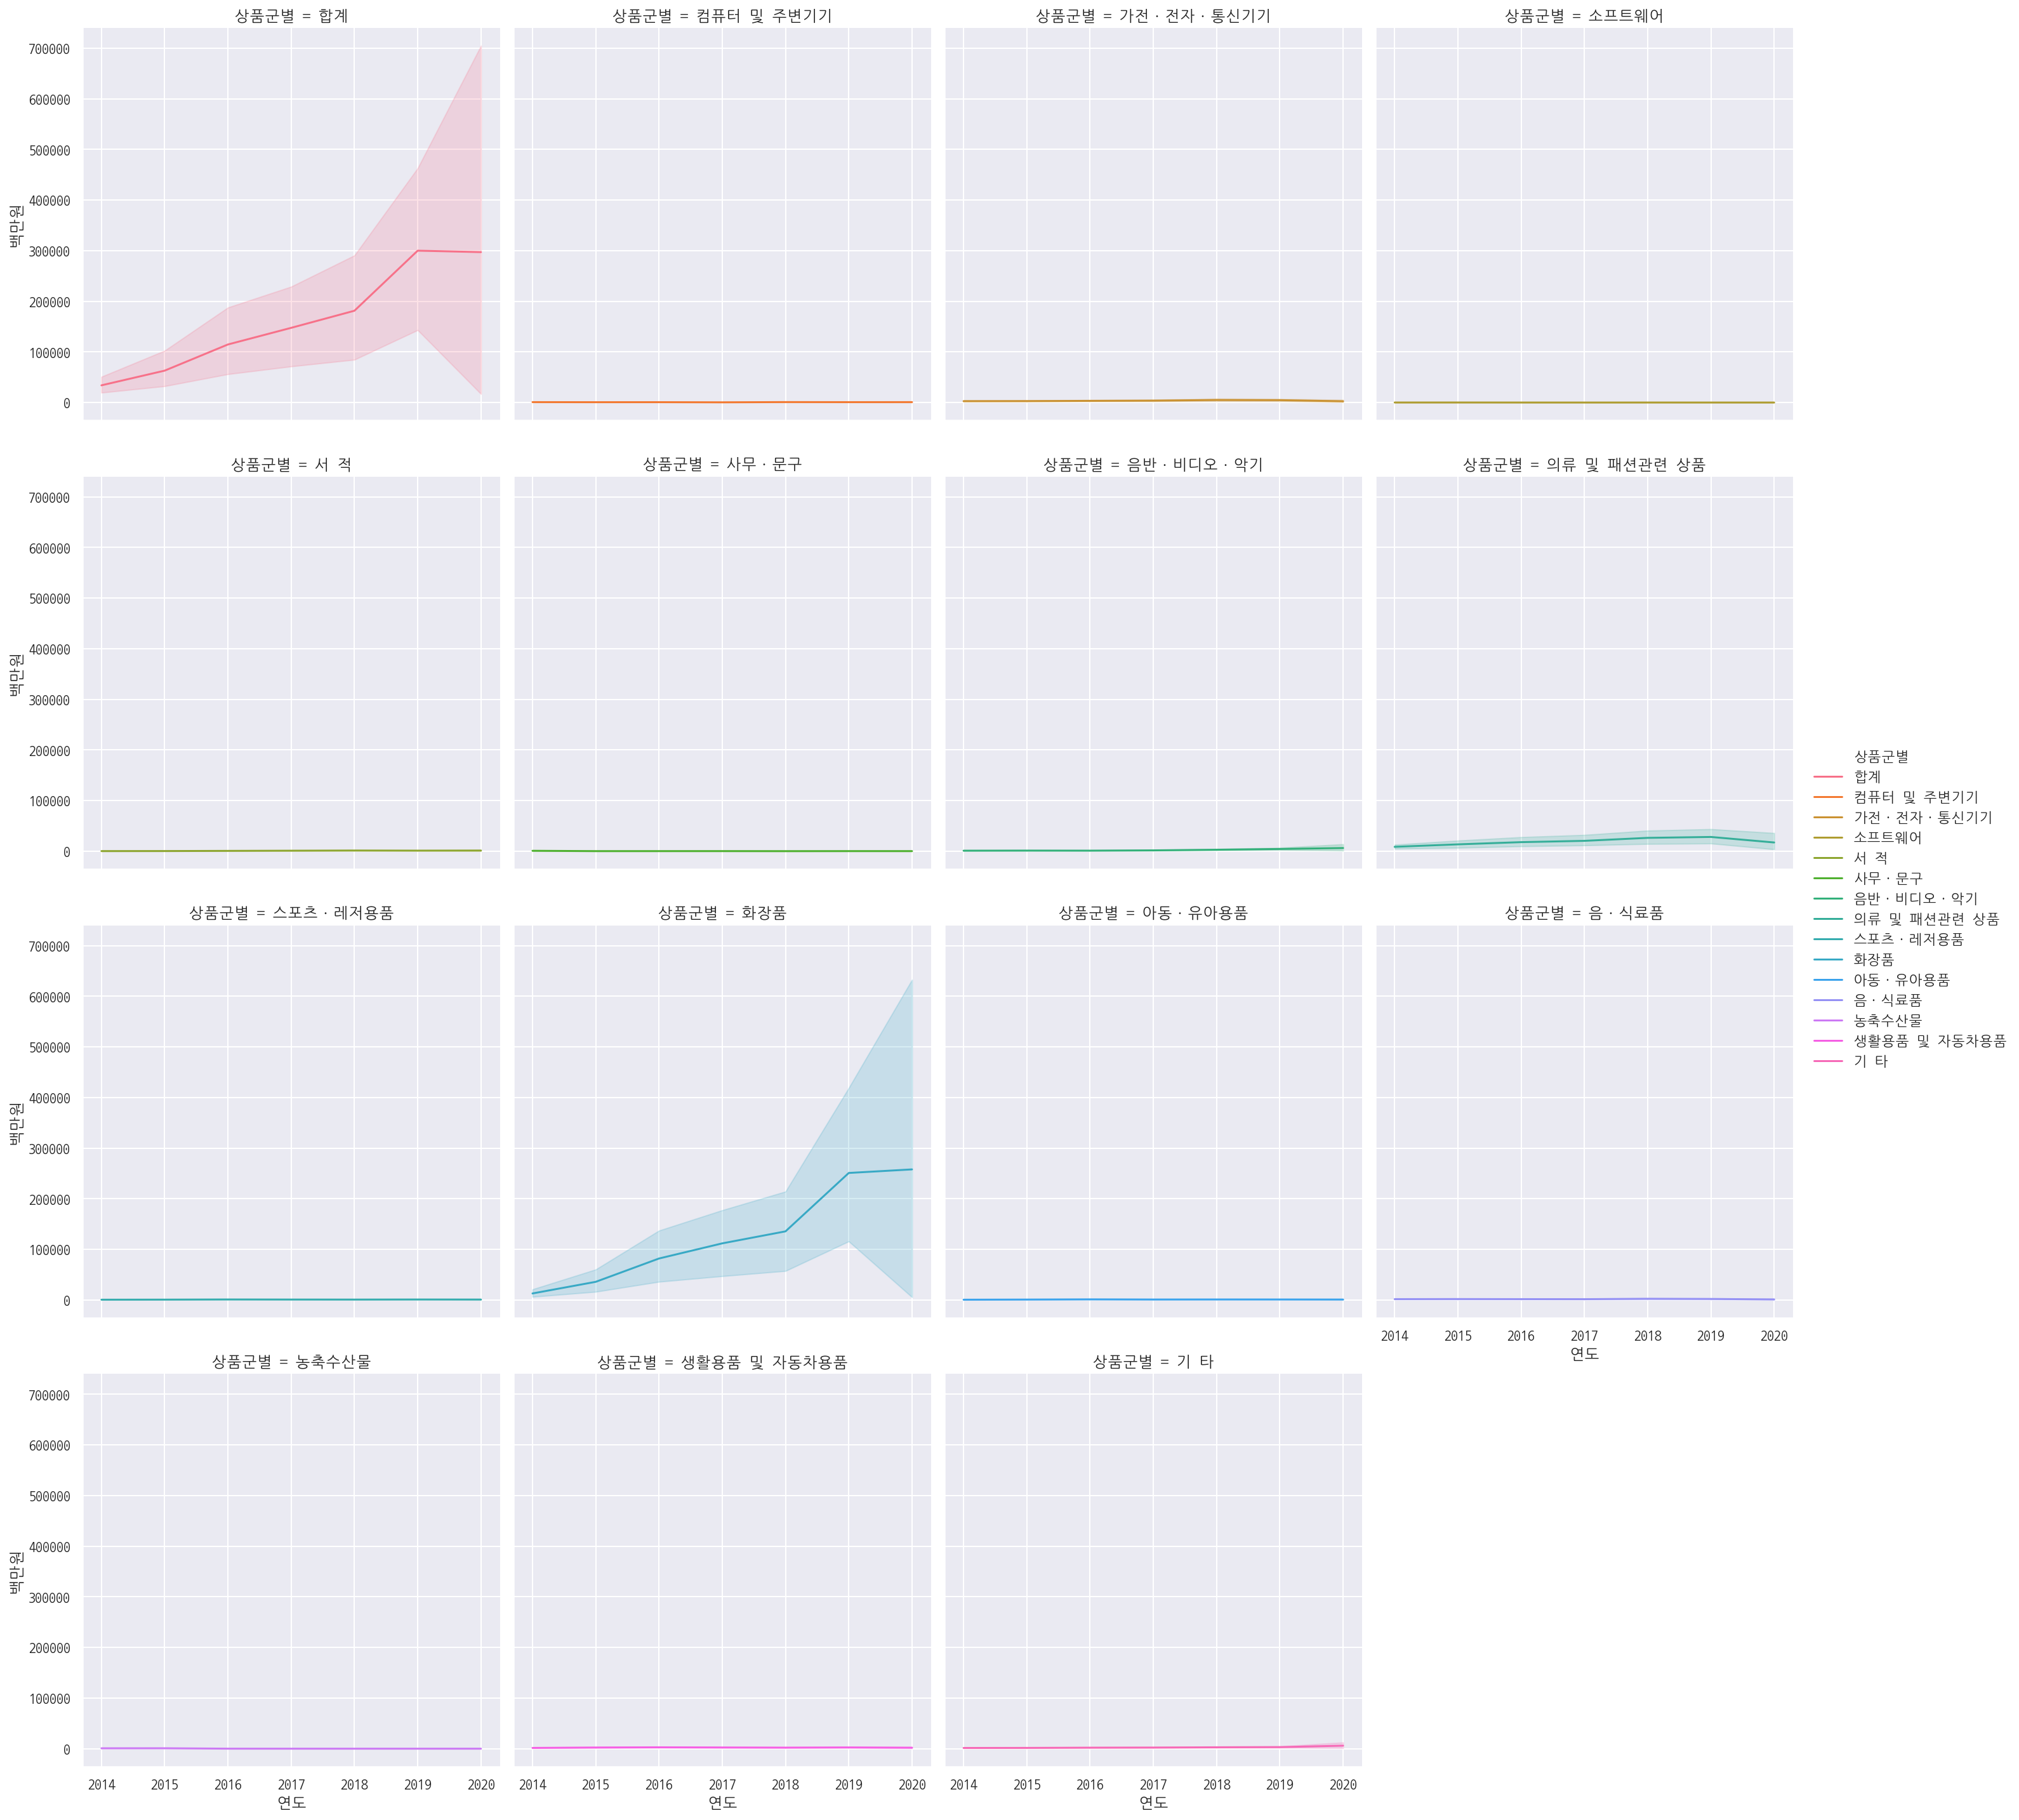

In [95]:
sns.relplot(data = df_total, x = "연도", y = "백만원", hue = "상품군별", kind = "line", col = "상품군별", col_wrap = 4)

In [150]:
df_sub = df_total[~df_total["상품군별"].isin(["화장품", "합계", "의류 및 패션관련 상품"])]

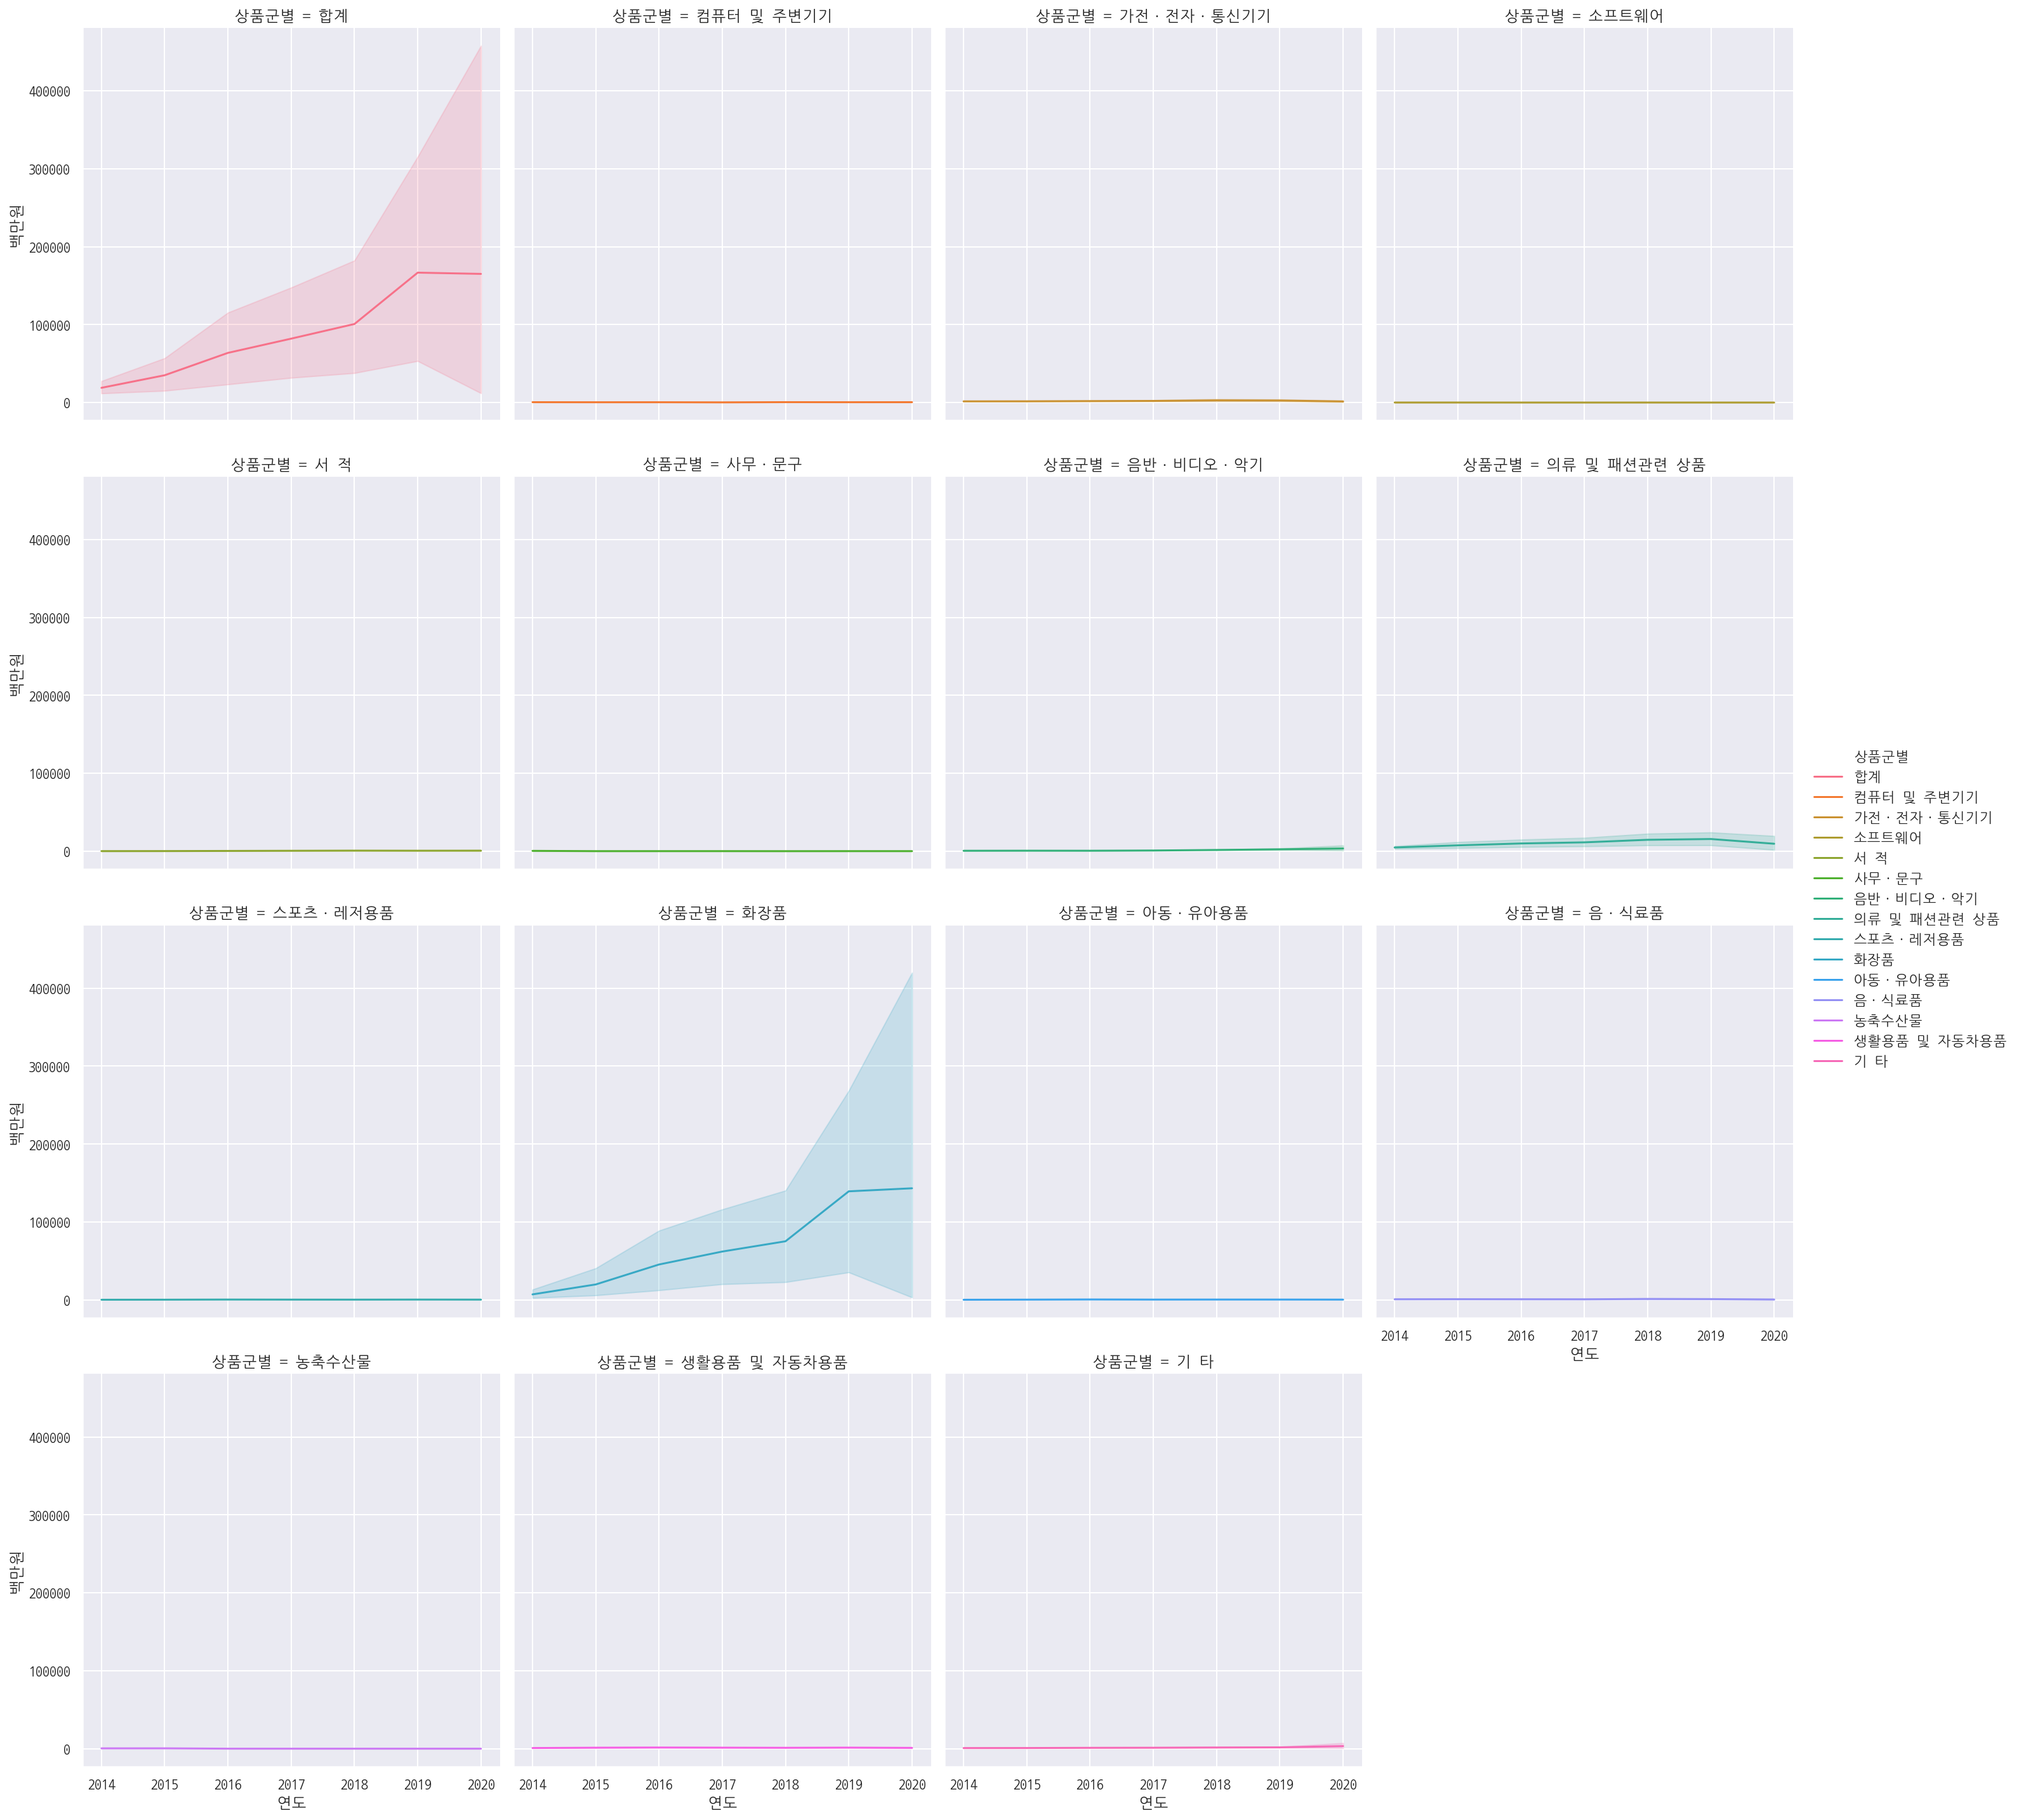

In [151]:
sns.relplot(data = df_sub, x = "연도", y = "백만원", hue = "상품군별", col = "상품군별", col_wrap = 4, kind = "line")


In [159]:
df_cosmetic = df_total[df_total["상품군별"] =="화장품"].copy()
df_cosmetic["상품군별"].unique()
df_cosmetic = df_cosmetic[~df_cosmetic["국가(대륙)별"].isin(["합계"])]

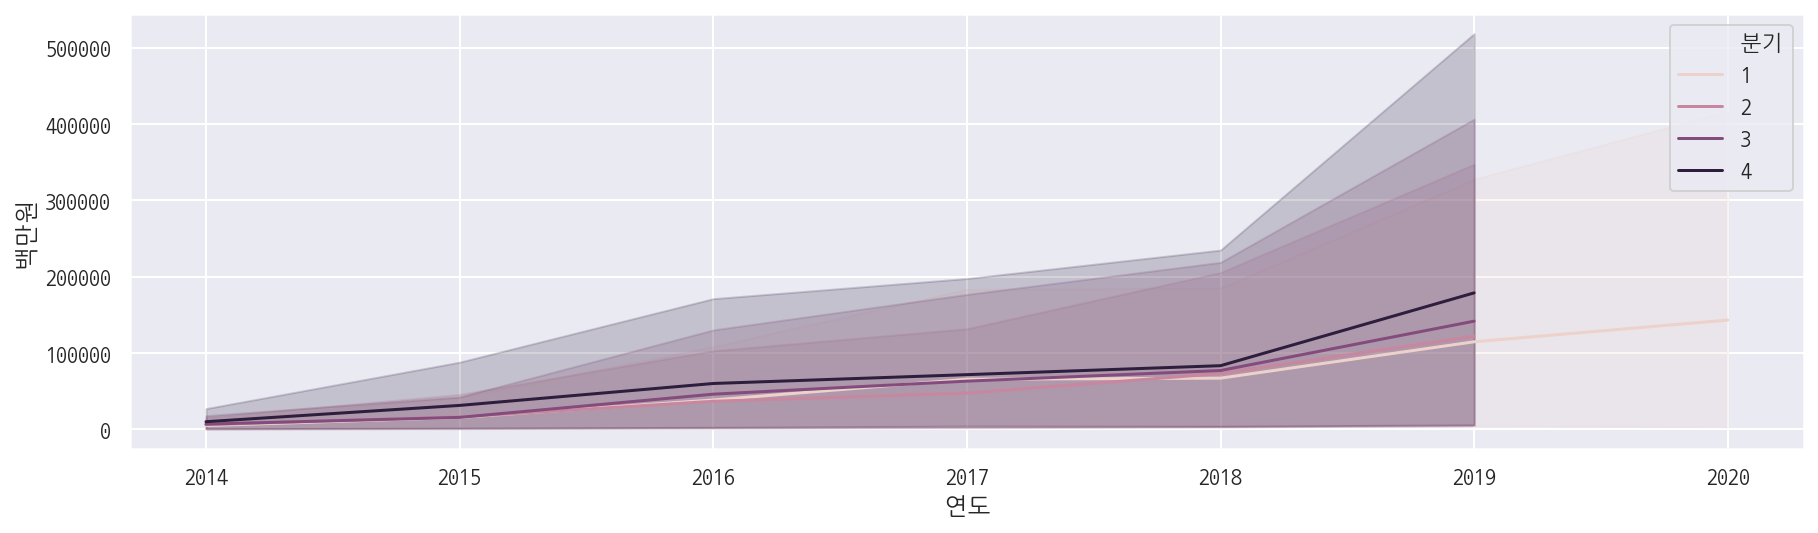

In [161]:
plt.figure(figsize = (15,4))
sns.lineplot(data = df_cosmetic, x = "연도", y = "백만원",hue = "분기")

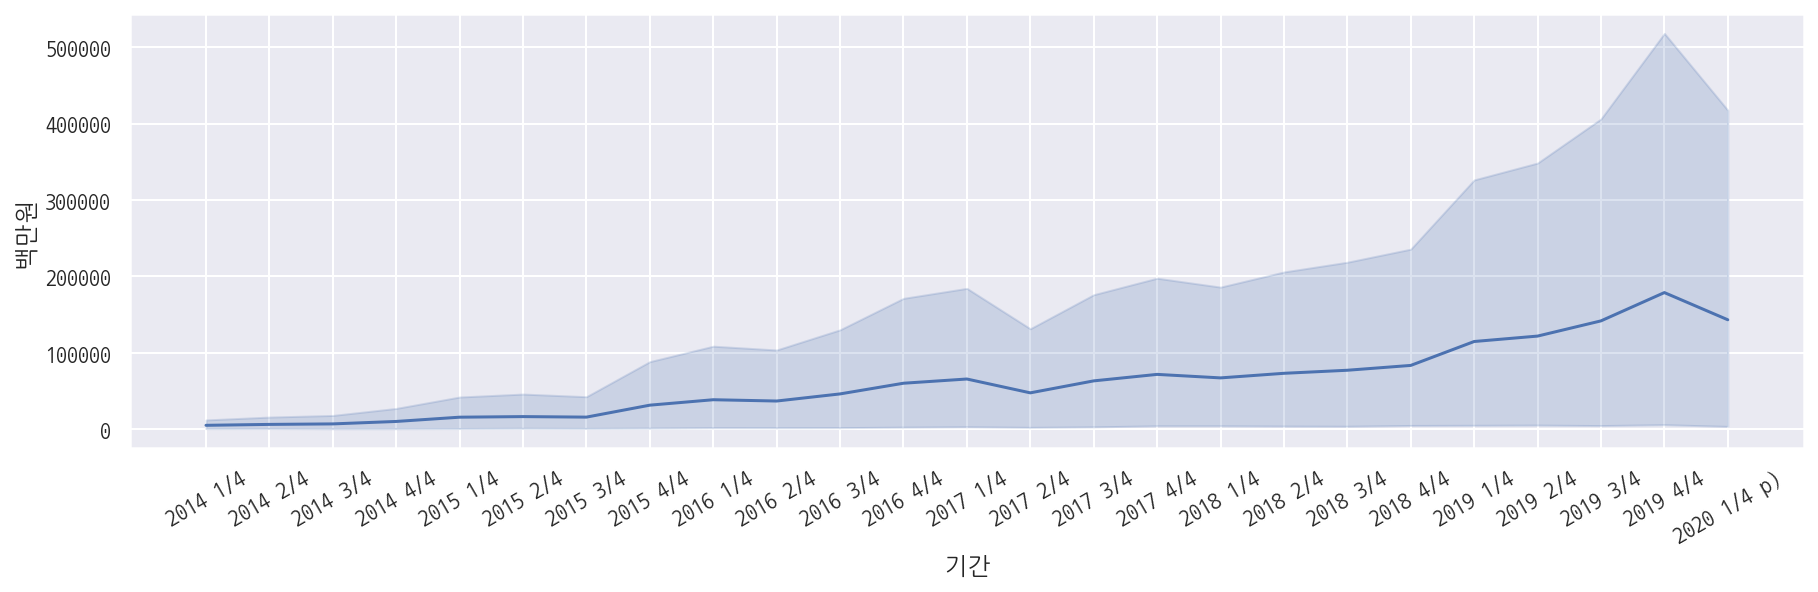

In [163]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="백만원")

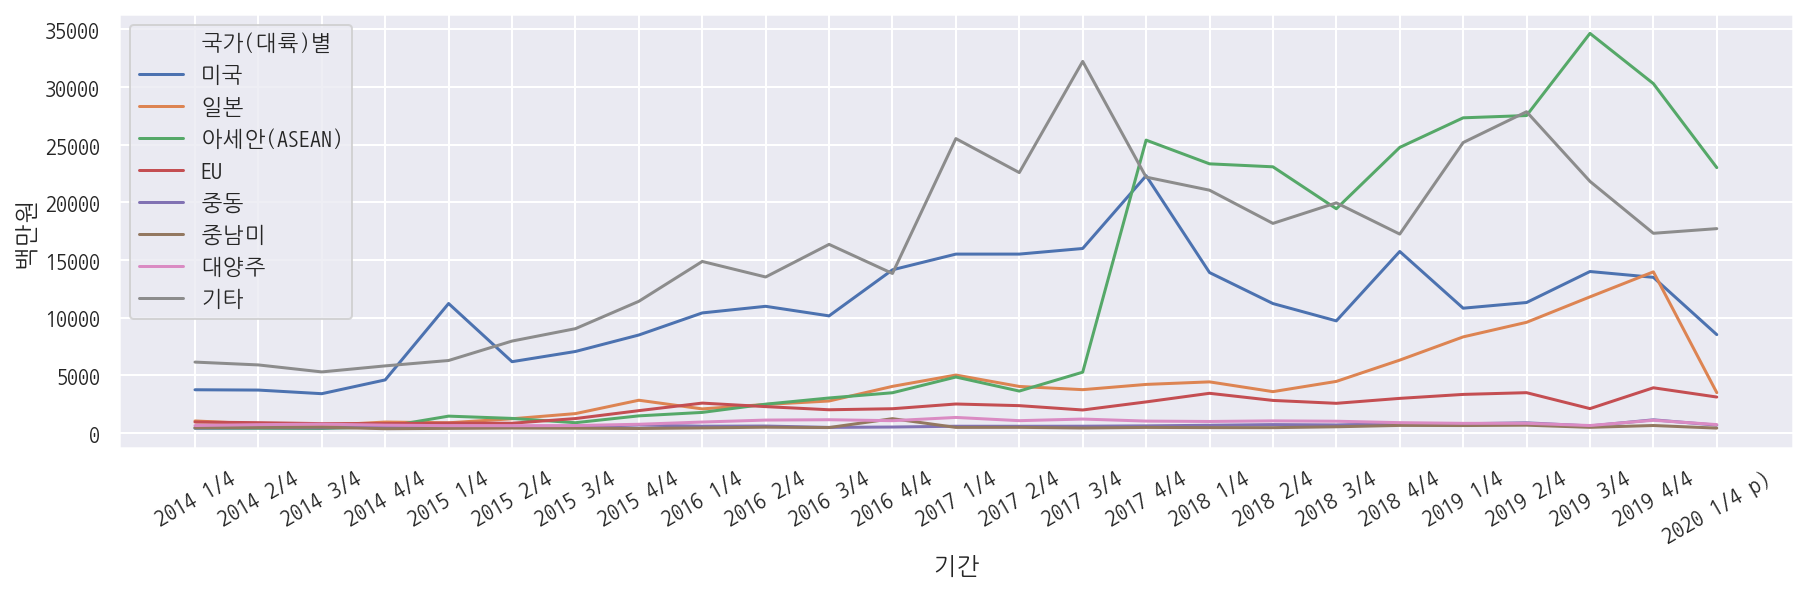

In [164]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic[df_cosmetic["국가(대륙)별"] != "중국"], 
             x="기간", y="백만원", hue = "국가(대륙)별")

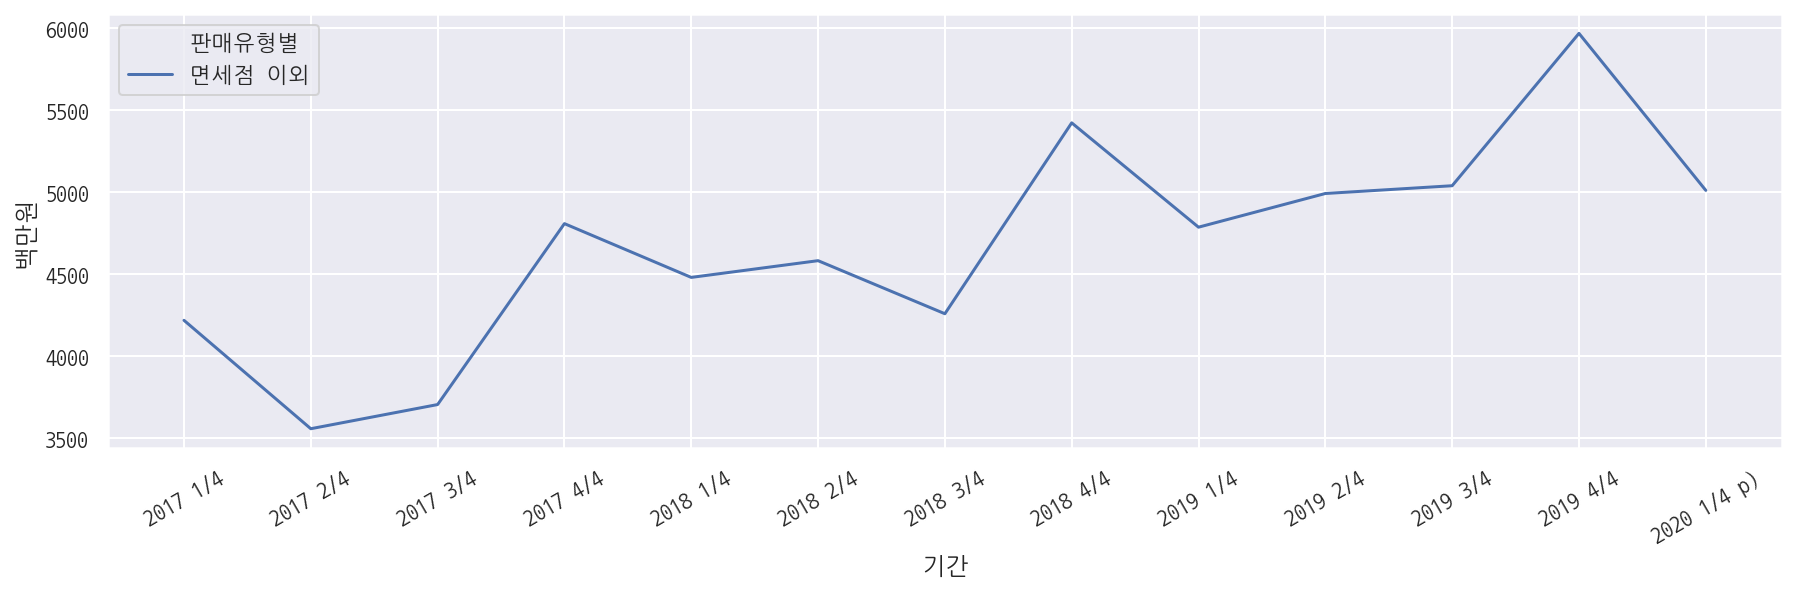

In [175]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
df_sub = df[(df["판매유형별"] != "계") & (df["판매유형별"] != "면세점")].copy()
sns.lineplot(data = df_sub, x ="기간" , y = "백만원", hue = "판매유형별",  ci = None)

# 의류 및 패션관련 상품 온라인 쇼핑 해외직접판매액

In [180]:
df_fashion = df[(df["상품군별"] == "의류 및 패션관련 상품") & (df["판매유형별"]=="계")].copy()
df_fashion.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기,백만언
21,합계,의류 및 패션관련 상품,계,2014 1/4,44868.0,2014,1,44868.0
66,미국,의류 및 패션관련 상품,계,2014 1/4,9810.0,2014,1,9810.0
111,중국,의류 및 패션관련 상품,계,2014 1/4,12206.0,2014,1,12206.0
156,일본,의류 및 패션관련 상품,계,2014 1/4,13534.0,2014,1,13534.0
201,아세안(ASEAN),의류 및 패션관련 상품,계,2014 1/4,3473.0,2014,1,3473.0


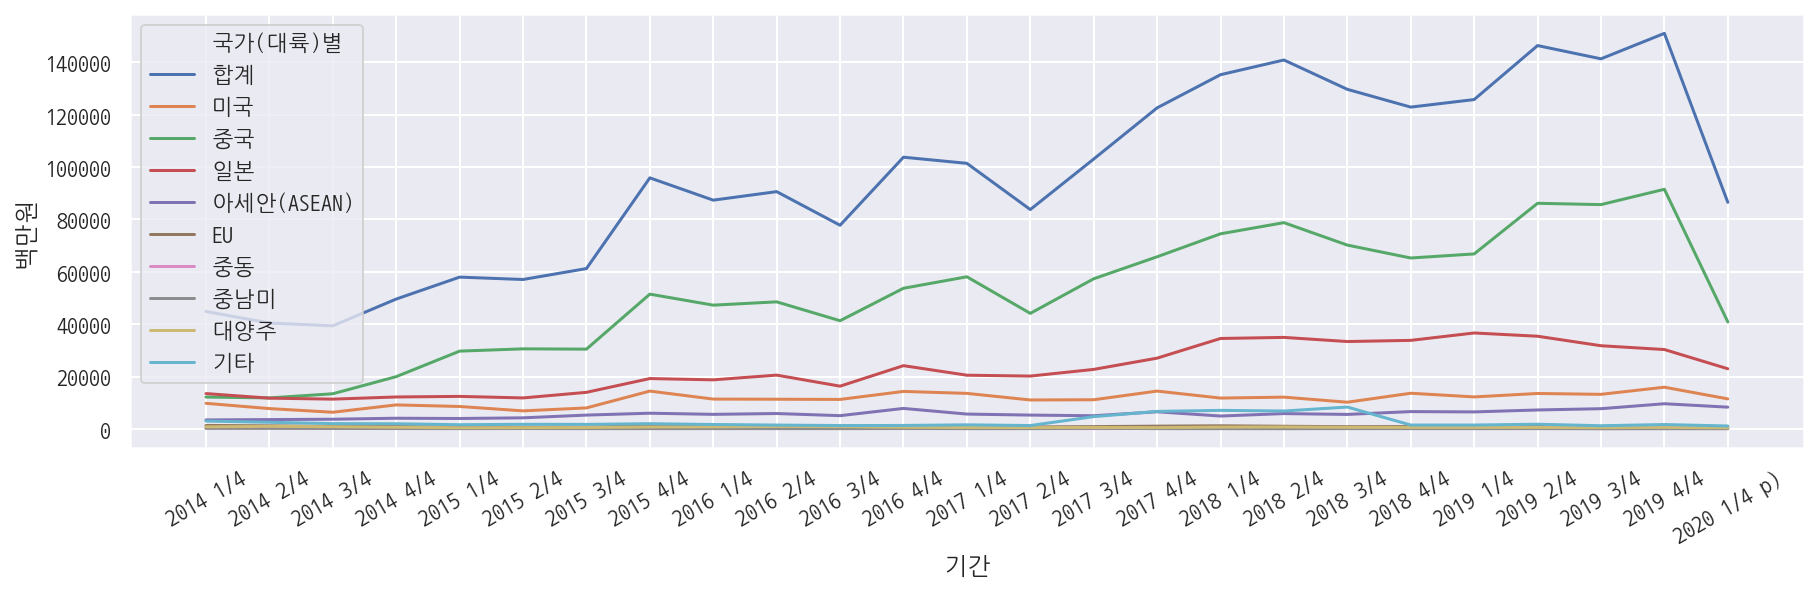

In [184]:
plt.figure(figsize = (15,4))
plt.xticks(rotation = 30)
sns.lineplot(data = df_fashion, x = "기간", y = "백만원",hue = "국가(대륙)별")

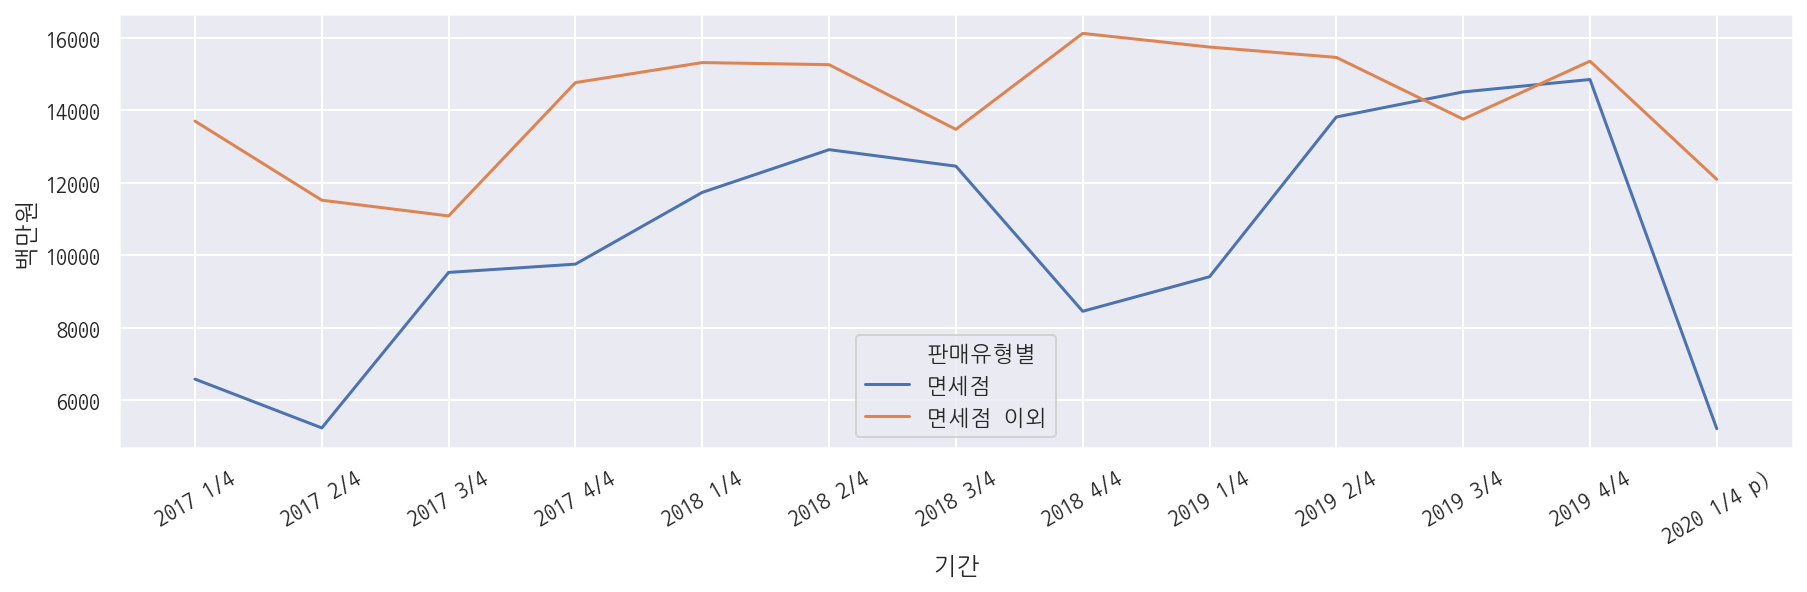

In [189]:
df_fashion2 = df[(df["상품군별"] == "의류 및 패션관련 상품") & (df["판매유형별"] != "계")].copy()
plt.figure(figsize = (15,4))
plt.xticks(rotation = 30)
sns.lineplot(data = df_fashion2, x = "기간", y = "백만원",hue = "판매유형별", ci = None)

In [197]:
df_fashion.head(2)

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기,백만언
21,합계,의류 및 패션관련 상품,계,2014 1/4,44868.0,2014,1,44868.0
66,미국,의류 및 패션관련 상품,계,2014 1/4,9810.0,2014,1,9810.0


# 데이터 집계하기

In [201]:
result = df_fashion.pivot_table(index = "국가(대륙)별", columns = "연도", values = "백만원", aggfunc = "sum")
result

연도,2014,2015,2016,2017,2018,2019,2020
국가(대륙)별,,,,,,,
EU,4485.0,3374.0,4899.0,3736.0,4114.0,3694.0,803.0
기타,9683.0,7248.0,5918.0,14387.0,23901.0,6309.0,1161.0
대양주,3392.0,2349.0,3401.0,2266.0,2725.0,2387.0,461.0
미국,33223.0,38066.0,48451.0,50353.0,47875.0,55035.0,11507.0
아세안(ASEAN),14936.0,19639.0,24478.0,22671.0,23068.0,31217.0,8349.0
일본,48960.0,57594.0,79905.0,90584.0,136800.0,134243.0,23007.0
중국,57531.0,142339.0,190932.0,225407.0,288848.0,330254.0,40899.0
중남미,975.0,616.0,649.0,762.0,576.0,543.0,113.0
중동,1172.0,1018.0,968.0,772.0,879.0,924.0,258.0


In [198]:
df_fashion["판매유형별"].value_counts()

계    250
Name: 판매유형별, dtype: int64

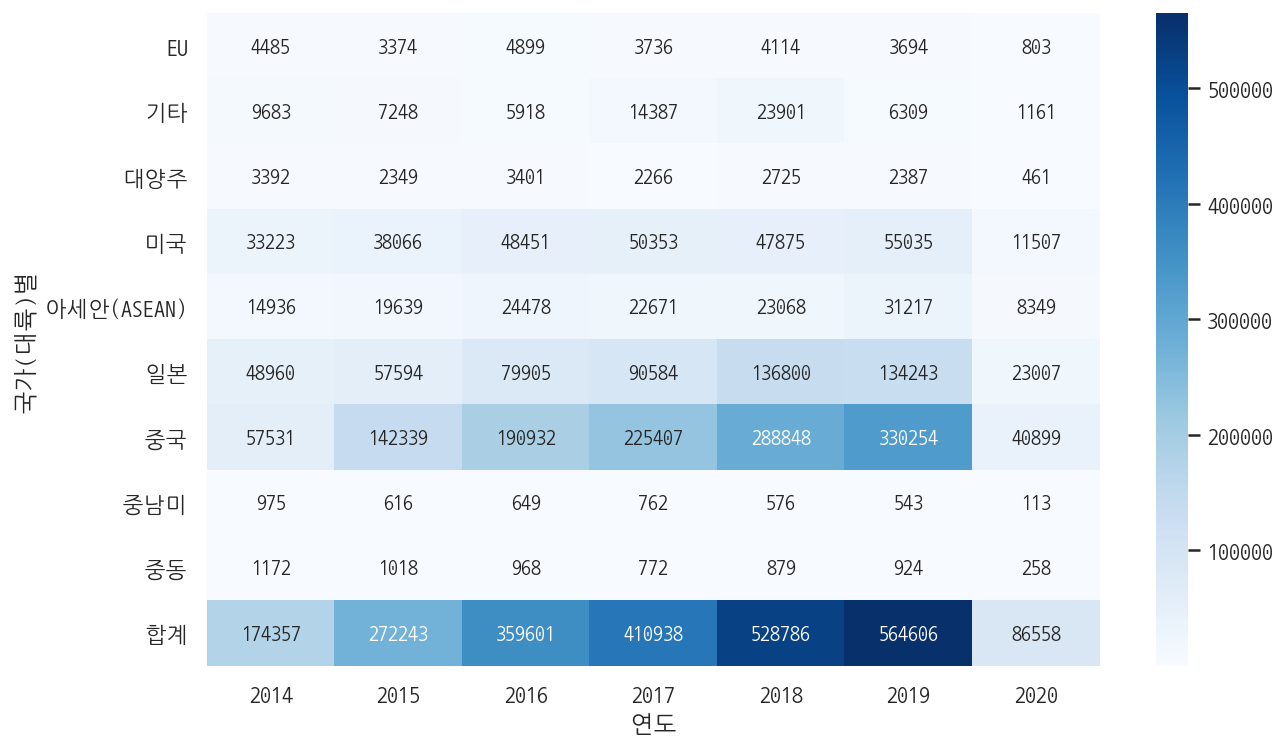

In [209]:
plt.figure(figsize = (10,6))
sns.heatmap(result, cmap = "Blues", annot = True, fmt = ".0f")

# 온라인 쇼핑 해외 직접판매액의 증가여부 

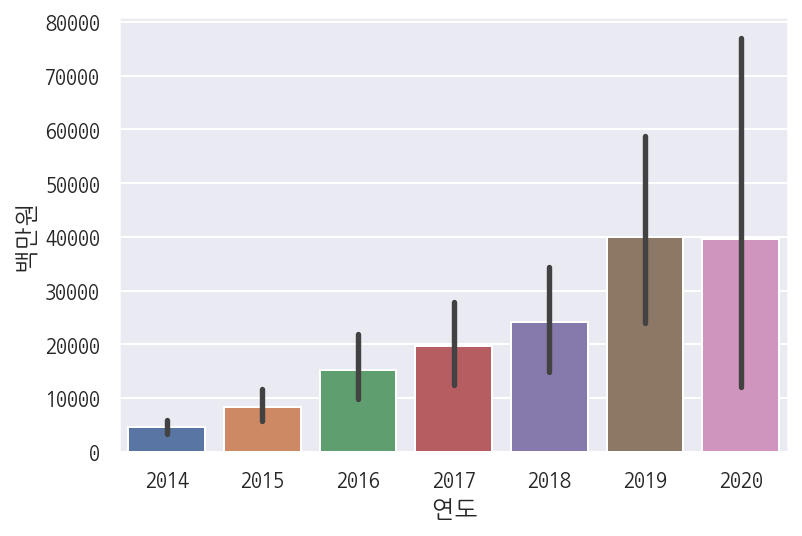

In [212]:
sns.barplot(data = df_total, x = "연도", y = "백만원")

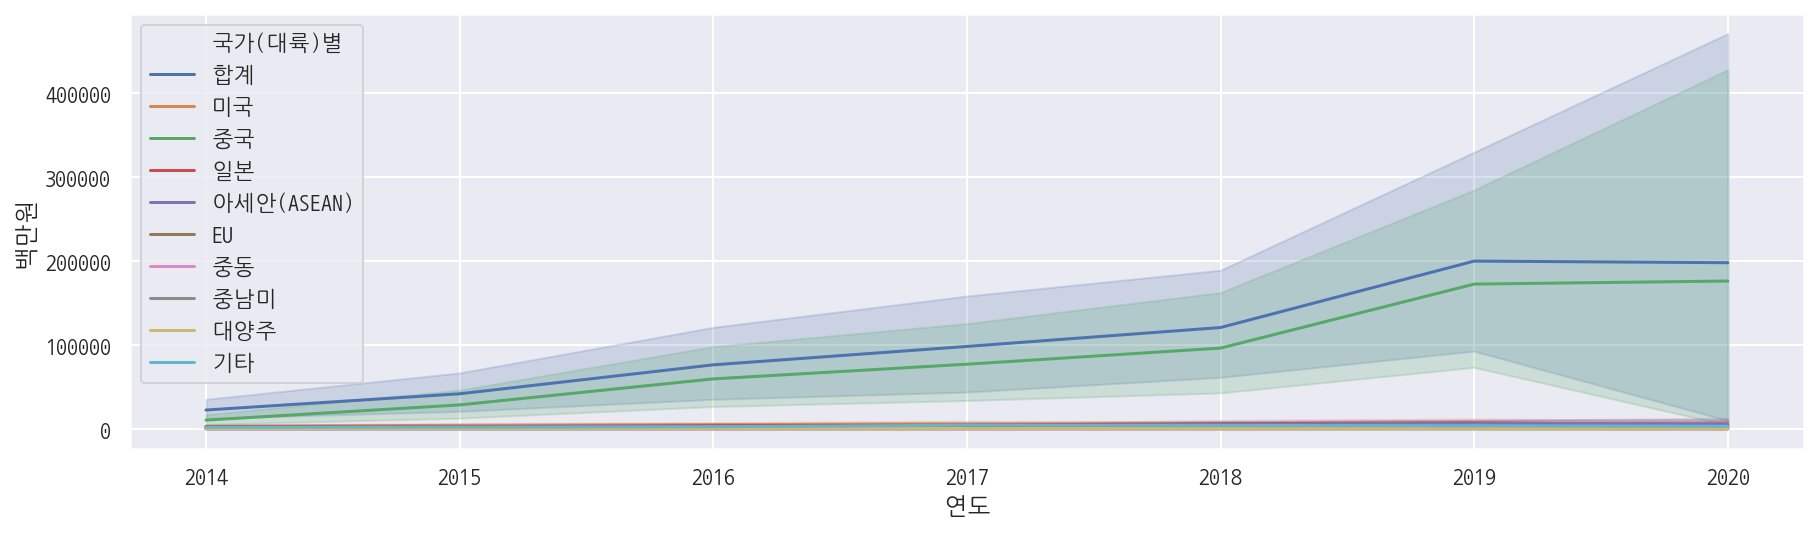

In [217]:
plt.figure(figsize = (15,4))
sns.lineplot(data = df_total, x = "연도", y = "백만원", hue = "국가(대륙)별")

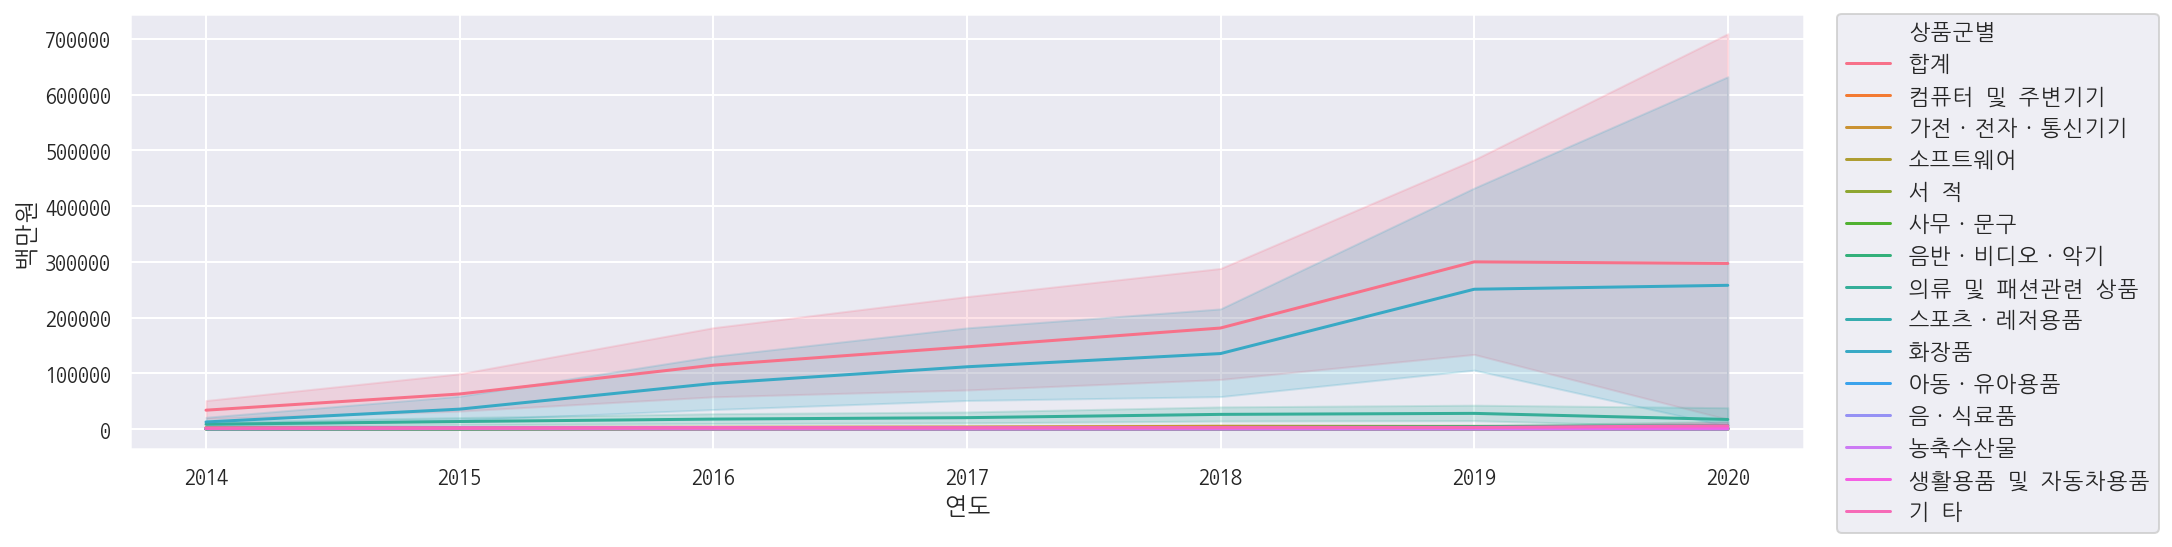

In [219]:
plt.figure(figsize = (15,4))
sns.lineplot(data = df_total, x = "연도", y = "백만원", hue = "상품군별")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0,)